<a href="https://colab.research.google.com/github/drshahizan/special-topic-data-engineering/blob/main/project/submission/MichelinStar/Movie_(MichelinStar).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

######**Group Members:**
######Eddie Wong Chung Pheng	(A20EC0031)
######Yong Zhi Yan (A20EC0172)
######Tan Yong Sheng (A20EC0157)
######Low Junyi (A20EC0071)
######Vincent Boo Ee Khai(A20EC0231)

# **Download the Dataset**

Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset. It is an important step for ensuring the quality and reliability of data analysis.

In [ ]:
#Import libraries
import pandas as pd, numpy as np
import re

In [ ]:
#Load data
data = "/content/movie.csv"
movie = pd.read_csv(data, encoding='latin-1')
movie

,movie_id,title,description_short,description_long,year,country_id,rating,genre_id,actors,director,featured,kids_restriction,url,trailer_url,duration
0,1,Spider-Man: Across the Spider-Verse,"After reuniting with Gwen Stacy, Brooklyns fu...","After reuniting with Gwen Stacy, Brooklyns fu...",2023,1,5,1,"[""1"", ""2"", ""3""]",1,1,0,https://www.youtube.com/watch?v=46spiINi3o0,https://www.acrossthespiderverse.movie,8400
1,2,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...","Spanning the years 1945 to 1955, a chronicle o...",1972,1,5,2,"[""4"", ""5"", ""6""]",2,1,0,https://www.youtube.com/watch?v=Ew9ngL1GZvs,http://www.thegodfather.com/,10500
2,3,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,Framed in the 1940s for the double murder of h...,1994,1,5,2,"[""7"", ""8"", ""9""]",3,1,0,https://www.youtube.com/watch?v=PLl99DlL6b4,NaN,8520
3,4,The Godfather Part II,In the continuing saga of the Corleone crime f...,In the continuing saga of the Corleone crime f...,1974,1,5,2,"[""5"", ""10"", ""11""]",2,1,0,https://www.youtube.com/watch?v=rcU6DUUUd7k,NaN,12120
4,5,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...","Raj is a rich, carefree, happy-go-lucky second...",1995,2,5,3,"[""12"", ""13"", ""14""]",4,1,0,https://www.youtube.com/watch?v=oIZ4U21DRlM,NaN,11400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,576,An Autumn Afternoon,Shuhei Hirayama is a widower with a 24-year-ol...,Shuhei Hirayama is a widower with a 24-year-ol...,1962,3,3,2,"[""324"", ""101"", ""1354""]",93,1,0,https://www.youtube.com/watch?v=Z3x7ffIpsUU,NaN,6840
576,577,Indiana Jones and the Last Crusade,"In 1938, an art collector appeals to eminent a...","In 1938, an art collector appeals to eminent a...",1989,1,3,9,"[""116"", ""1355"", ""1356""]",5,1,0,https://www.youtube.com/watch?v=DKg36LBVgfg,http://www.indianajones.com/crusade,7620
577,578,Don't Be Bad,A story set in the 90s and in the outskirts of...,A story set in the 90s and in the outskirts of...,2015,10,3,13,"[""1357"", ""650"", ""1358""]",401,1,0,https://www.youtube.com/watch?v=8WxlD7Wm2hE,NaN,6000
578,579,The Best Offer,Virgil Oldman is a world renowned antiques exp...,Virgil Oldman is a world renowned antiques exp...,2013,10,3,2,"[""1359"", ""1360"", ""1361""]",18,1,0,https://www.youtube.com/watch?v=zJGleGyahC8,NaN,7860


In [ ]:
movie.head()

,movie_id,title,description_short,description_long,year,country_id,rating,genre_id,actors,director,featured,kids_restriction,url,trailer_url,duration
0,1,Spider-Man: Across the Spider-Verse,"After reuniting with Gwen Stacy, Brooklyns fu...","After reuniting with Gwen Stacy, Brooklyns fu...",2023,1,5,1,"[""1"", ""2"", ""3""]",1,1,0,https://www.youtube.com/watch?v=46spiINi3o0,https://www.acrossthespiderverse.movie,8400
1,2,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...","Spanning the years 1945 to 1955, a chronicle o...",1972,1,5,2,"[""4"", ""5"", ""6""]",2,1,0,https://www.youtube.com/watch?v=Ew9ngL1GZvs,http://www.thegodfather.com/,10500
2,3,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,Framed in the 1940s for the double murder of h...,1994,1,5,2,"[""7"", ""8"", ""9""]",3,1,0,https://www.youtube.com/watch?v=PLl99DlL6b4,NaN,8520
3,4,The Godfather Part II,In the continuing saga of the Corleone crime f...,In the continuing saga of the Corleone crime f...,1974,1,5,2,"[""5"", ""10"", ""11""]",2,1,0,https://www.youtube.com/watch?v=rcU6DUUUd7k,NaN,12120
4,5,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...","Raj is a rich, carefree, happy-go-lucky second...",1995,2,5,3,"[""12"", ""13"", ""14""]",4,1,0,https://www.youtube.com/watch?v=oIZ4U21DRlM,NaN,11400


In [ ]:
movie.tail()

,movie_id,title,description_short,description_long,year,country_id,rating,genre_id,actors,director,featured,kids_restriction,url,trailer_url,duration
575,576,An Autumn Afternoon,Shuhei Hirayama is a widower with a 24-year-ol...,Shuhei Hirayama is a widower with a 24-year-ol...,1962,3,3,2,"[""324"", ""101"", ""1354""]",93,1,0,https://www.youtube.com/watch?v=Z3x7ffIpsUU,NaN,6840
576,577,Indiana Jones and the Last Crusade,"In 1938, an art collector appeals to eminent a...","In 1938, an art collector appeals to eminent a...",1989,1,3,9,"[""116"", ""1355"", ""1356""]",5,1,0,https://www.youtube.com/watch?v=DKg36LBVgfg,http://www.indianajones.com/crusade,7620
577,578,Don't Be Bad,A story set in the 90s and in the outskirts of...,A story set in the 90s and in the outskirts of...,2015,10,3,13,"[""1357"", ""650"", ""1358""]",401,1,0,https://www.youtube.com/watch?v=8WxlD7Wm2hE,NaN,6000
578,579,The Best Offer,Virgil Oldman is a world renowned antiques exp...,Virgil Oldman is a world renowned antiques exp...,2013,10,3,2,"[""1359"", ""1360"", ""1361""]",18,1,0,https://www.youtube.com/watch?v=zJGleGyahC8,NaN,7860
579,580,Louis C.K.: Live at the Beacon Theater,"Recorded November 10th, 2011 as part of the Ne...","Recorded November 10th, 2011 as part of the Ne...",2011,1,3,3,"[""1290""]",381,1,0,NaN,https://buy.louisck.net/,3720


In [ ]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   movie_id           580 non-null    int64 
 1   title              580 non-null    object
 2   description_short  580 non-null    object
 3   description_long   580 non-null    object
 4   year               580 non-null    int64 
 5   country_id         580 non-null    int64 
 6   rating             580 non-null    int64 
 7   genre_id           580 non-null    int64 
 8   actors             580 non-null    object
 9   director           580 non-null    int64 
 10  featured           580 non-null    int64 
 11  kids_restriction   580 non-null    int64 
 12  url                534 non-null    object
 13  trailer_url        256 non-null    object
 14  duration           580 non-null    int64 
dtypes: int64(9), object(6)
memory usage: 68.1+ KB


# **Data Cleaning**

In [ ]:
movie.isna().sum()

movie_id               0
title                  0
description_short      0
description_long       0
year                   0
country_id             0
rating                 0
genre_id               0
actors                 0
director               0
featured               0
kids_restriction       0
url                   46
trailer_url          324
duration               0
dtype: int64

In [ ]:
# Remove any missing values (NaN)
movie.dropna(inplace=True)

# Drop any duplicate rows
movie.drop_duplicates(inplace=True)

In [ ]:
movie.isna().sum()

movie_id             0
title                0
description_short    0
description_long     0
year                 0
country_id           0
rating               0
genre_id             0
actors               0
director             0
featured             0
kids_restriction     0
url                  0
trailer_url          0
duration             0
dtype: int64

Retrieve the list from unique_countries.csv

In [ ]:
country_list = [1,	'United States of America',
2,	'India',
3,	'Japan',
4,	'South Korea',
5,	'United Kingdom',
6,	'Unknown',
7,	'New Zealand',
8,	'France',
9,	'Italy',
10,	'China',
11,	'Mexico',
12,	'Brazil',
13,	'Spain',
14,	'Colombia',
15,	'Soviet Union',
16,	'Turkey',
17,	'Taiwan',
18,	'Canada',
19,	'Sweden',
20,	'Germany',
21,	'Hong Kong',
22,	'Australia',
23,	'Belgium',
24,	'Cyprus',
25,	'Ecuador',
26,	'United Arab Emirates',
27,	'Czech Republic',
28,	'Netherlands',
29,	'Argentina',
30,	'Dominican Republic',
31,	'Russia',
32,	'Austria',
33,	'Switzerland',
34,	'Iran',
35,	'South Africa',
36,	'Malawi',
37,	'Thailand',
38,	'Ireland',
39,	'Denmark',
40,	'Algeria']

In [ ]:
# use zip to pair the elements of the list
country_dict = dict(zip(country_list[::2], country_list[1::2]))

# use the replace method on the country_id column
movie['country_id'] = movie['country_id'].replace(country_dict)

In [ ]:
# see the modified column
movie['country_id']

0      United States of America
1      United States of America
5      United States of America
6                         Japan
8                         Japan
                 ...           
551              Czech Republic
554                       Japan
555                       Japan
570                 South Korea
576    United States of America
Name: country_id, Length: 242, dtype: object

Reapeat the same step for genre column

In [ ]:
# convert the list to a dictionary
genre_list = [1,	'Action',
2,	'Adventure',
3,	'Animation',
4,	'Science Fiction',
5,	'Drama',
6,	'Crime',
7,	'Comedy',
8,	'Romance',
9,	'History',
10,	'War',
11,	'Family',
12,	'Fantasy',
13,	'Thriller',
14,	'Western',
15,	'Horror']

In [ ]:
# use zip to pair the elements of the list
genre_dict = dict(zip(genre_list[::2], genre_list[1::2]))

# use the replace method on the genre_id column
movie['genre_id'] = movie['genre_id'].replace(genre_dict)

In [ ]:
# see the modified column
movie['genre_id']

0               Action
1            Adventure
5            Adventure
6      Science Fiction
8                Drama
            ...       
551                 18
554    Science Fiction
555          Adventure
570          Adventure
576            History
Name: genre_id, Length: 242, dtype: object

In [ ]:
movie.head()

,movie_id,title,description_short,description_long,year,country_id,rating,genre_id,actors,director,featured,kids_restriction,url,trailer_url,duration
0,1,Spider-Man: Across the Spider-Verse,"After reuniting with Gwen Stacy, Brooklyns fu...","After reuniting with Gwen Stacy, Brooklyns fu...",2023,United States of America,5,Action,"[""1"", ""2"", ""3""]",1,1,0,https://www.youtube.com/watch?v=46spiINi3o0,https://www.acrossthespiderverse.movie,8400
1,2,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...","Spanning the years 1945 to 1955, a chronicle o...",1972,United States of America,5,Adventure,"[""4"", ""5"", ""6""]",2,1,0,https://www.youtube.com/watch?v=Ew9ngL1GZvs,http://www.thegodfather.com/,10500
5,6,Schindler's List,The true story of how businessman Oskar Schind...,The true story of how businessman Oskar Schind...,1993,United States of America,5,Adventure,"[""15"", ""16"", ""17""]",5,1,0,https://www.youtube.com/watch?v=mxphAlJID9U,http://www.schindlerslist.com/,11700
6,7,Spirited Away,"A young girl, Chihiro, becomes trapped in a st...","A young girl, Chihiro, becomes trapped in a st...",2001,Japan,5,Science Fiction,"[""18"", ""19"", ""20""]",6,1,0,https://www.youtube.com/watch?v=ByXuk9QqQkk,http://movies.disney.com/spirited-away,7500
8,9,Your Name.,High schoolers Mitsuha and Taki are complete s...,High schoolers Mitsuha and Taki are complete s...,2016,Japan,5,Drama,"[""24"", ""25"", ""26""]",8,1,0,https://www.youtube.com/watch?v=_oWzYOwXn-o,https://www.funimationfilms.com/movie/yourname/,6360


In [ ]:
# Remove any unnecessary columns

In [ ]:
movie = movie.drop(['description_short', 'description_long','movie_id','actors','director','featured','kids_restriction','url','trailer_url'], axis=1)
movie

,title,year,country_id,rating,genre_id,duration
0,Spider-Man: Across the Spider-Verse,2023,United States of America,5,Action,8400
1,The Godfather,1972,United States of America,5,Adventure,10500
5,Schindler's List,1993,United States of America,5,Adventure,11700
6,Spirited Away,2001,Japan,5,Science Fiction,7500
8,Your Name.,2016,Japan,5,Drama,6360
...,...,...,...,...,...,...
551,A Bag of Marbles,2017,Czech Republic,3,18,6600
554,Kiki's Delivery Service,1989,Japan,3,Science Fiction,6180
555,Departures,2008,Japan,3,Adventure,7800
570,"Spring, Summer, Fall, Winter... and Spring",2003,South Korea,3,Adventure,6180


In [ ]:
# get descriptive statistics for year, rating, and duration
movie.describe()

,year,rating,duration
count,242.000000,242.000000,242.000000
mean,2009.962810,3.652893,7043.057851
std,13.709594,0.713948,1930.920423
min,1931.000000,3.000000,360.000000
25%,2003.250000,3.000000,6060.000000
50%,2016.000000,4.000000,7020.000000
75%,2019.000000,4.000000,7965.000000
max,2023.000000,5.000000,14520.000000


# **Machine Learning**

Apply ML algorithm which is linear regression.

In [ ]:
# Import the LinearRegression class
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = movie[['rating', 'duration']]  # Features
y = movie['country_id']  # Target variable

# Split the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.3469387755102041


# **Visualization**

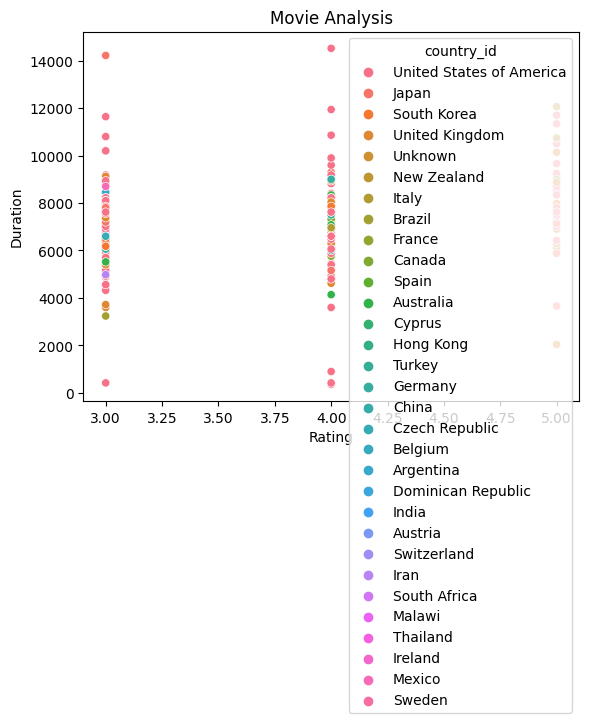

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot
sns.scatterplot(data=movie, x='rating', y='duration', hue='country_id')

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Duration')
plt.title('Movie Analysis')

# Display the plot
plt.show()